In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime as dt

In [100]:
df = pd.read_csv("/content/hotel_bookings.csv")

In [101]:
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [102]:
df.shape

(119390, 32)

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [104]:
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [105]:
df = df.drop('company',axis=1)

In [106]:
df['agent'].median()

14.0

In [107]:
df['agent'] = df['agent'].fillna(14.0)

In [108]:
df['country'] = df['country'].fillna('PRT')

In [109]:
df['country'].isnull().sum()

np.int64(0)

In [110]:
df['children'] = df['children'].fillna(0)

In [111]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,14.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,14.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,14.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [112]:
df['Date'] = pd.to_datetime(df['arrival_date_day_of_month'].astype(str) + df['arrival_date_month'].astype(str) + df['arrival_date_year'].astype(str))

In [113]:
df['Date'] = df['Date'].dt.strftime('%d-%m-%Y')


In [114]:
df['reservation_status_date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 119390 entries, 0 to 119389
Series name: reservation_status_date
Non-Null Count   Dtype 
--------------   ----- 
119390 non-null  object
dtypes: object(1)
memory usage: 932.9+ KB


In [115]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date']).dt.strftime('%d-%m-%Y')

In [116]:
df.select_dtypes(include='number').head()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,0,342,2015,27,1,0,0,2,0.0,0,0,0,0,3,14.0,0,0.0,0,0
1,0,737,2015,27,1,0,0,2,0.0,0,0,0,0,4,14.0,0,0.0,0,0
2,0,7,2015,27,1,0,1,1,0.0,0,0,0,0,0,14.0,0,75.0,0,0
3,0,13,2015,27,1,0,1,1,0.0,0,0,0,0,0,304.0,0,75.0,0,0
4,0,14,2015,27,1,0,2,2,0.0,0,0,0,0,0,240.0,0,98.0,0,1


In [117]:
df['lead_time'].describe()

,lead_time
count,119390.000000
mean,104.011416
std,106.863097
min,0.000000
25%,18.000000
50%,69.000000
75%,160.000000
max,737.000000


In [118]:
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [119]:
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [120]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,14.0,0,Transient,0.0,0,0,Check-Out,01-07-2015,01-07-2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,14.0,0,Transient,0.0,0,0,Check-Out,01-07-2015,01-07-2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,14.0,0,Transient,75.0,0,0,Check-Out,02-07-2015,01-07-2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,02-07-2015,01-07-2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,03-07-2015,01-07-2015


In [121]:
df.duplicated().sum()

np.int64(32020)

In [122]:
df.drop_duplicates(inplace=True)

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87370 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87370 non-null  object 
 1   is_canceled                     87370 non-null  int64  
 2   lead_time                       87370 non-null  int64  
 3   arrival_date_year               87370 non-null  int64  
 4   arrival_date_month              87370 non-null  object 
 5   arrival_date_week_number        87370 non-null  int64  
 6   arrival_date_day_of_month       87370 non-null  int64  
 7   stays_in_weekend_nights         87370 non-null  int64  
 8   stays_in_week_nights            87370 non-null  int64  
 9   adults                          87370 non-null  int64  
 10  children                        87370 non-null  float64
 11  babies                          87370 non-null  int64  
 12  meal                            8737

In [124]:
df.select_dtypes(include='float').columns

Index(['children', 'agent', 'adr'], dtype='object')

In [127]:
lst = ['agent', 'adr']

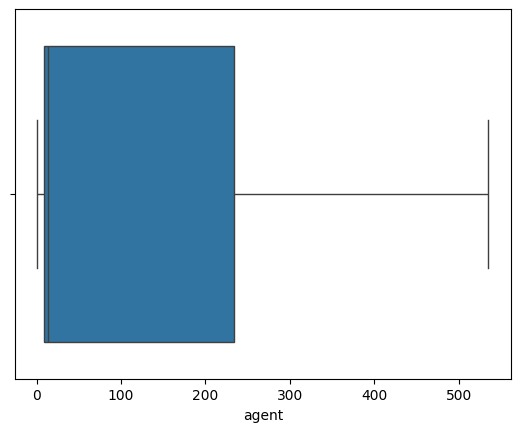

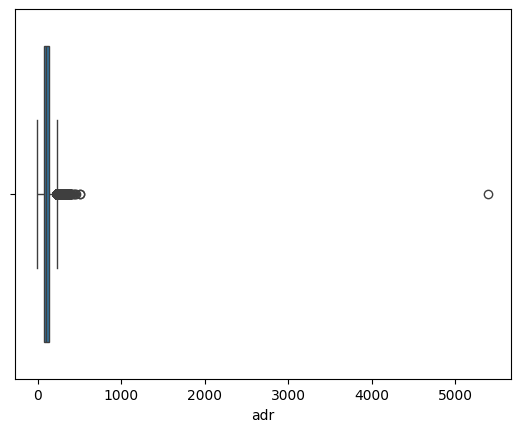

In [128]:
for i in lst:
  sns.boxplot(x=df[i],data=df)
  plt.show()

In [129]:
df['adr'].describe()

,adr
count,87370.000000
mean,106.346935
std,55.004259
min,-6.380000
25%,72.000000
50%,98.100000
75%,134.000000
max,5400.000000


In [138]:
q1, q2, q3 = np.percentile(df['adr'],[25,50,75])

In [139]:
print(q1,q2,q3)

72.0 98.1 134.0


In [141]:
iqr = q3-q1
lf = q1 - 1.5*iqr
uf = q3 + 1.5*iqr

In [142]:
print(lf,uf)

-21.0 227.0


In [156]:
df_new = df[(df['adr'] >= lf) & (df['adr'] <=uf)]

<Axes: xlabel='adr'>

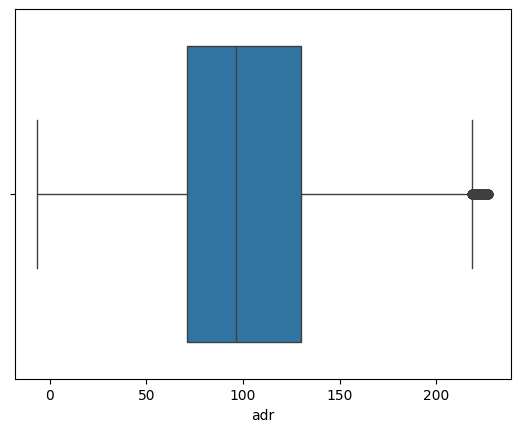

In [157]:
sns.boxplot(x=df_new['adr'], data =df)

In [175]:
df_new['adr'].max()

227.0

In [155]:
df_new['adr'].min()

-6.38

In [174]:
df_new['adr'][(df_new['adr'] == 227.0)].count()

np.int64(14)

### EDA

In [178]:
df_new.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'Date'],
      dtype='object')

In [183]:
df_stay = df_new[['stays_in_weekend_nights','stays_in_week_nights']].value_counts().reset_index()
df_stay

,stays_in_weekend_nights,stays_in_week_nights,count
0,0,1,12921
1,0,2,9346
2,0,3,7275
3,2,5,7216
4,1,2,5855
...,...,...,...
80,13,33,1
81,14,35,1
82,16,41,1
83,18,42,1


Text(0, 0.5, 'Frequency')

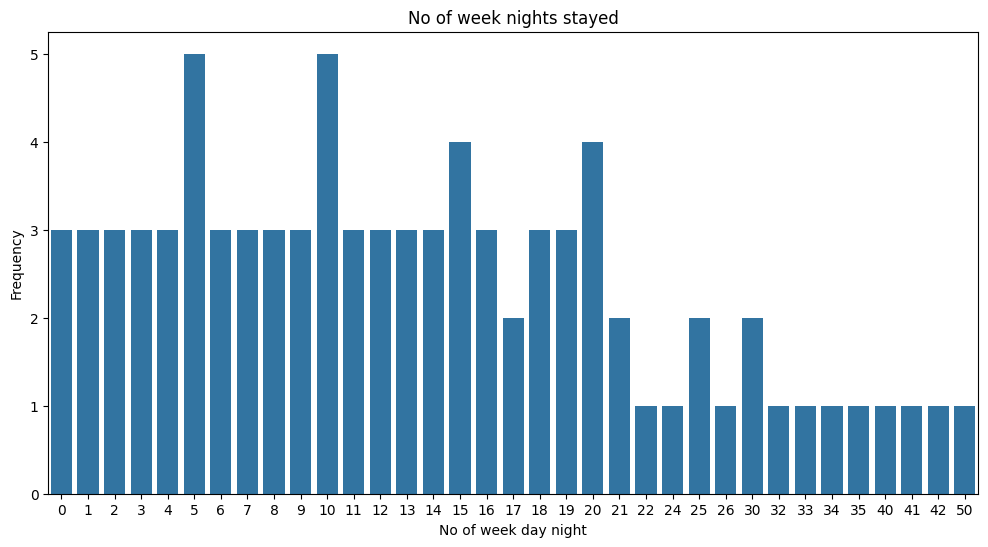

In [201]:
plt.figure(figsize=(12,6))
sns.countplot(x='stays_in_week_nights',data=df_stay)
plt.title("No of week nights stayed")
plt.xlabel('No of week nights')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

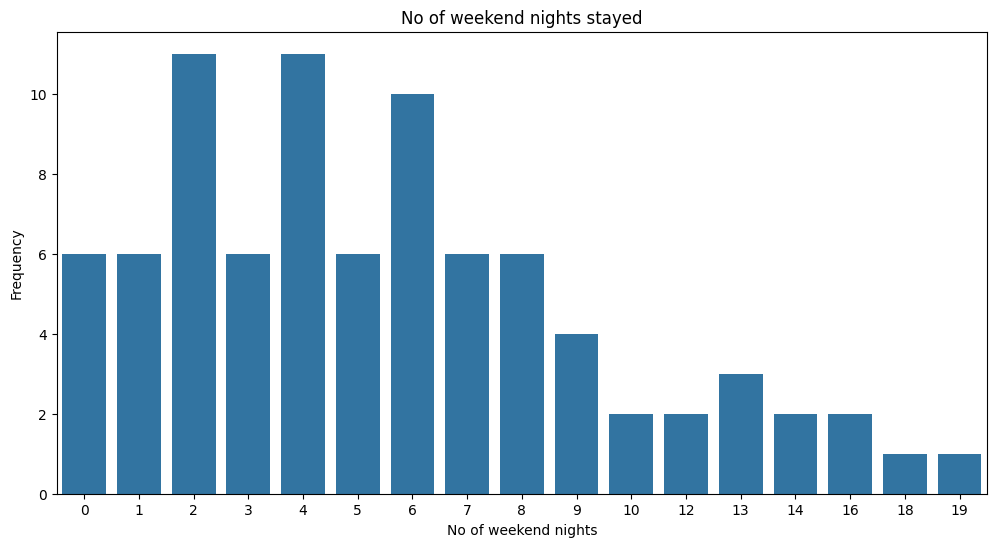

In [202]:
plt.figure(figsize=(12,6))
sns.countplot(x='stays_in_weekend_nights',data=df_stay)
plt.title("No of weekend nights stayed")
plt.xlabel('No of weekend nights')
plt.ylabel('Frequency')

In [203]:
df_new

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,14.0,0,Transient,0.00,0,0,Check-Out,01-07-2015,01-07-2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,14.0,0,Transient,0.00,0,0,Check-Out,01-07-2015,01-07-2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,14.0,0,Transient,75.00,0,0,Check-Out,02-07-2015,01-07-2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,02-07-2015,01-07-2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,03-07-2015,01-07-2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,06-09-2017,30-08-2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,07-09-2017,31-08-2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,07-09-2017,31-08-2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,0,Transient,104.40,0,0,Check-Out,07-09-2017,31-08-2017


In [207]:
hotel_type = df_new['hotel'].value_counts().reset_index()
hotel_type

,hotel,count
0,City Hotel,52649
1,Resort Hotel,32233


Text(0, 0.5, 'Frequency of hotels')

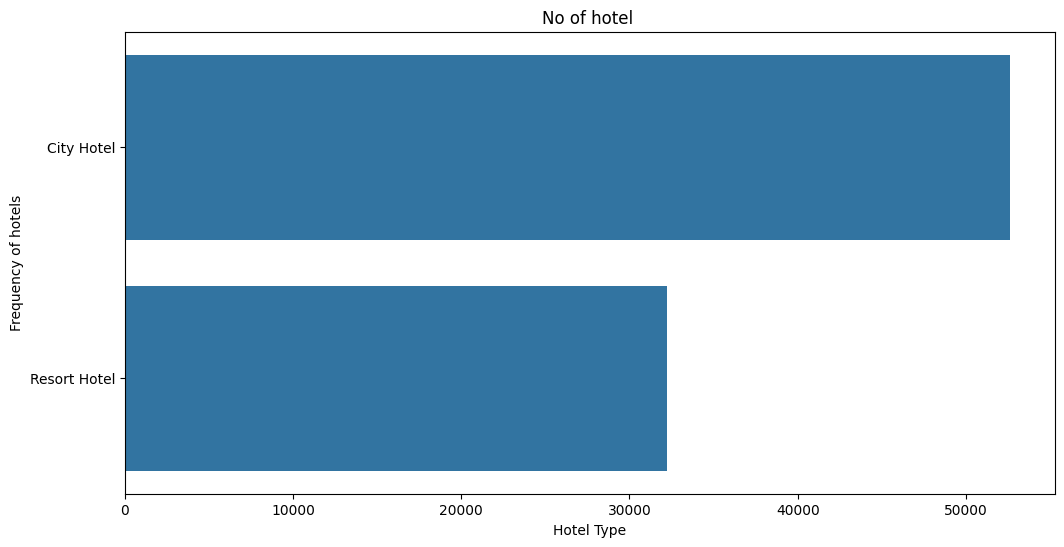

In [210]:
plt.figure(figsize=(12,6))
sns.barplot(x='count',y='hotel', data=hotel_type)
plt.title("No of hotel ")
plt.xlabel("Hotel Type")
plt.ylabel("Frequency of hotels")

In [217]:
country_vise = df_new['country'].value_counts().reset_index().sort_values(by='count',ascending=False)
country_vise

,country,count
0,PRT,27012
1,GBR,10252
2,FRA,8642
3,ESP,6790
4,DEU,5334
...,...,...
170,MRT,1
171,KIR,1
172,SDN,1
173,ATF,1


In [259]:
bins = [0,50,100,150,200,250]

<Axes: xlabel='adr', ylabel='Count'>

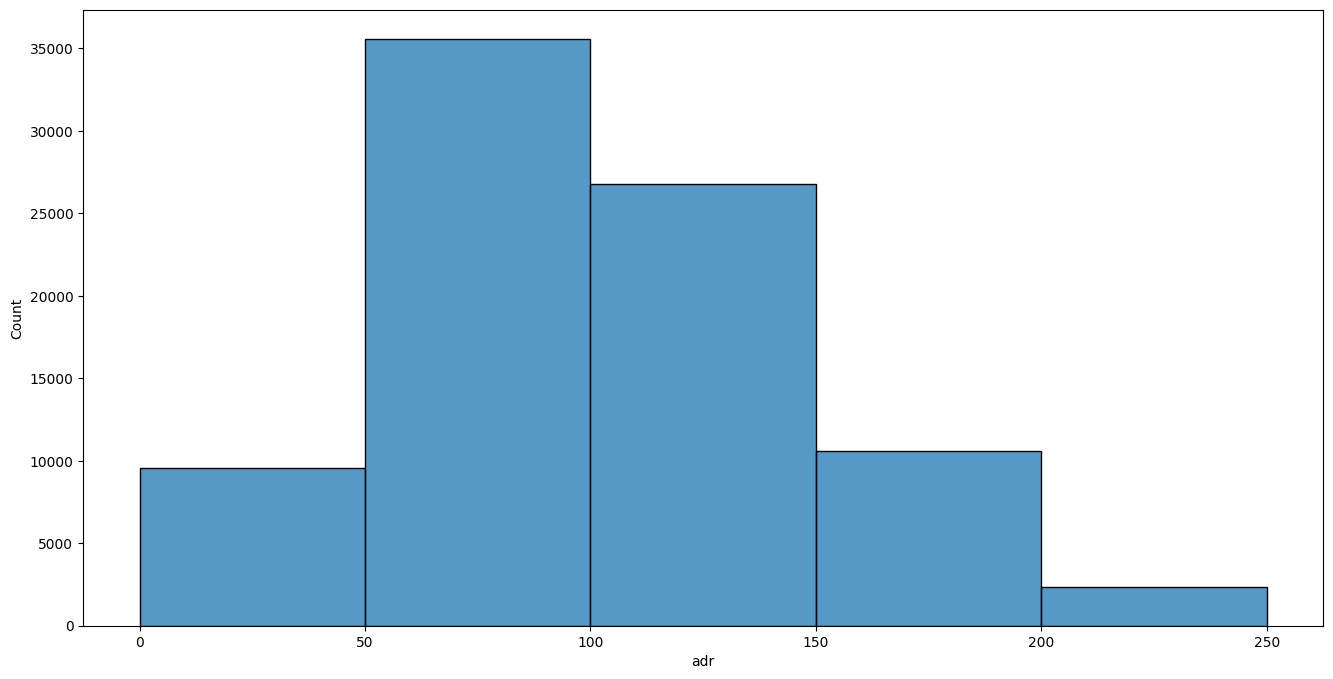

In [260]:
plt.figure(figsize=(16,8))
sns.histplot(x = df_new['adr'], bins=bins, data = df_new)

Text(0, 0.5, 'Frequency of customer country vise')

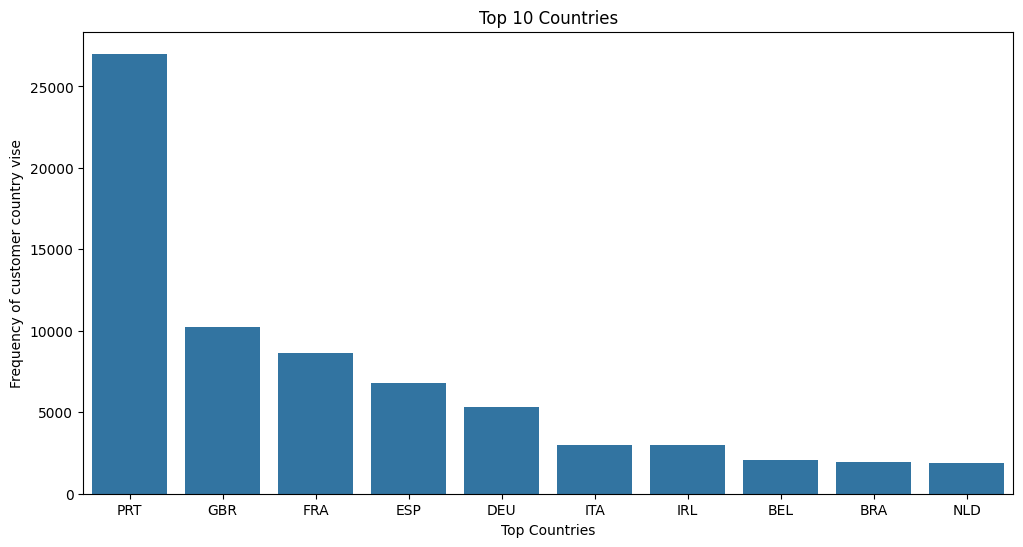

In [258]:
plt.figure(figsize=(12,6))
sns.barplot(x='country', y='count',data=country_vise.head(10))
plt.title("Top 10 Countries")
plt.xlabel("Top Countries")
plt.ylabel("Frequency of customer country vise")

In [222]:
cancellation_vise = df_new['is_canceled'].value_counts().reset_index()
cancellation_vise

,is_canceled,count
0,0,61823
1,1,23059


In [242]:
value = cancellation_vise['is_canceled'].map({0:"Not Cancelled",1:"Cancelled"})

In [243]:
value

,is_canceled
0,Not Cancelled
1,Cancelled


([<matplotlib.patches.Wedge at 0x7e0086f41310>,
 [Text(-0.7231315928632069, 0.8289033112511502, 'Not Cancelled'),
  Text(0.7231314677022809, -0.8289034204409736, 'Cancelled')],
 [Text(-0.3944354142890219, 0.45212907886426373, '72.83%'),
  Text(0.39443534601942587, -0.4521291384223492, '27.17%')])

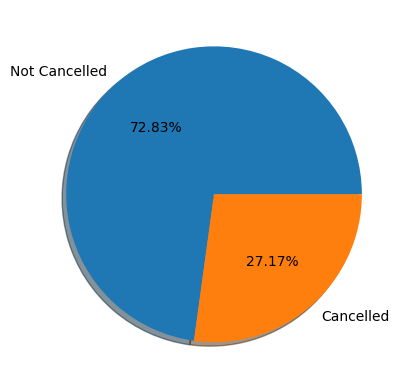

In [244]:
plt.pie(x = cancellation_vise['count'], labels = value, autopct='%1.2f%%' , shadow=True)

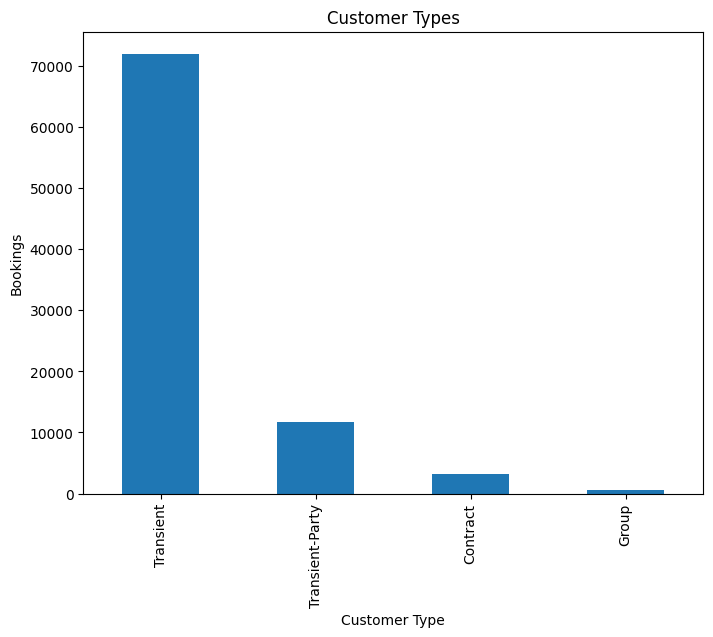

In [265]:
plt.figure(figsize=(8,6))
df_new['customer_type'].value_counts().plot(kind='bar')
plt.xlabel('Customer Type')
plt.ylabel('Bookings')
plt.title('Customer Types')
plt.show()

In [269]:
df_lead_time = df_new[df_new['lead_time'] < 400]
df_lead_time

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,14.0,0,Transient,0.00,0,0,Check-Out,01-07-2015,01-07-2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,14.0,0,Transient,75.00,0,0,Check-Out,02-07-2015,01-07-2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,02-07-2015,01-07-2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,03-07-2015,01-07-2015
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,14.0,0,Transient,107.00,0,0,Check-Out,03-07-2015,01-07-2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,06-09-2017,30-08-2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,07-09-2017,31-08-2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,07-09-2017,31-08-2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,0,Transient,104.40,0,0,Check-Out,07-09-2017,31-08-2017


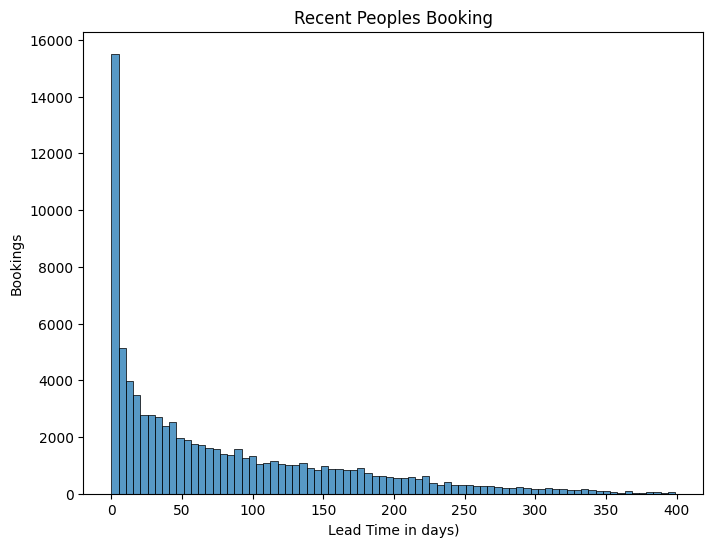

In [274]:
plt.figure(figsize=(8,6))
sns.histplot(x='lead_time', data= df_lead_time)
plt.xlabel('Lead Time in days)')
plt.ylabel('Bookings')
plt.title('Recent Peoples Booking')
plt.show()

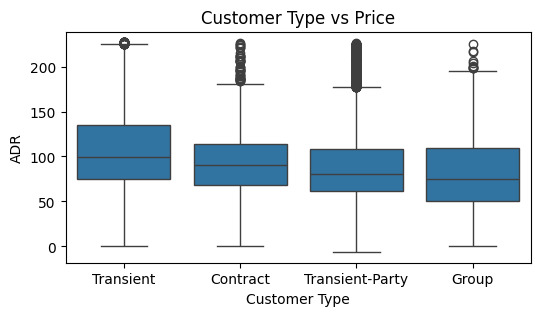

In [288]:

plt.figure(figsize=(6,3))
sns.boxplot(x='customer_type', y='adr', data = df_new)
plt.xlabel('Customer Type')
plt.ylabel('ADR')
plt.title('Customer Type vs Price')
plt.show()

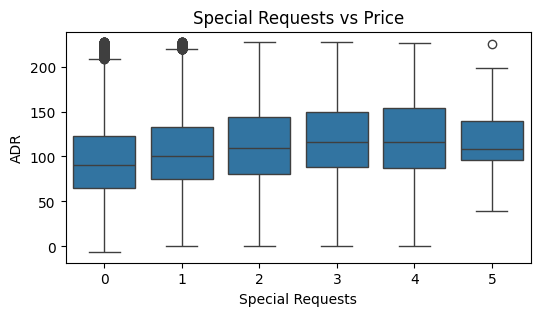

In [289]:
plt.figure(figsize=(6,3))
sns.boxplot(x='total_of_special_requests', y='adr', data= df_new)
plt.xlabel('Special Requests')
plt.ylabel('ADR')
plt.title('Special Requests vs Price')
plt.show()

In [293]:
top_country_adr = df_new.groupby('country')['adr'].sum().head(5).reset_index().sort_values(by='adr', ascending=False)
top_country_adr

,country,adr
1,AGO,36744.81
4,ARE,5795.74
2,ALB,937.24
3,AND,370.00
0,ABW,256.68


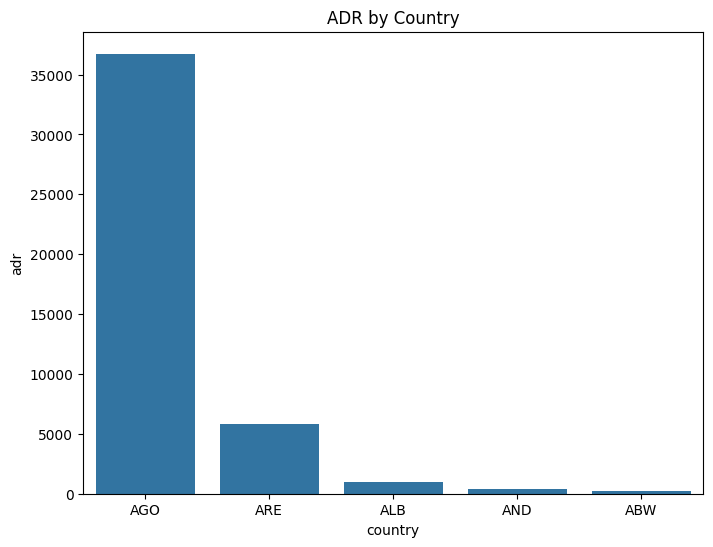

In [294]:
plt.figure(figsize=(8,6))
sns.barplot(x='country',y='adr', data=top_country_adr)
plt.title('ADR by Country')
plt.show()

<ipython-input-296-6aa540774f38>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['lead_time_group'] = pd.cut(df_new['lead_time'], bins=lead_time_bins, labels=labels, include_lowest=True)
<ipython-input-296-6aa540774f38>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_new.groupby('lead_time_group')['booking_changes'].mean().plot(kind='bar')


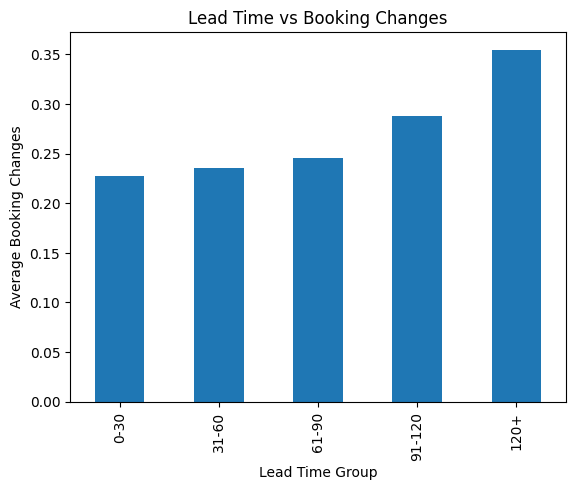

In [296]:

lead_time_bins = [0, 30, 60, 90, 120, 400]
labels = ['0-30', '31-60', '61-90', '91-120', '120+']
df_new['lead_time_group'] = pd.cut(df_new['lead_time'], bins=lead_time_bins, labels=labels, include_lowest=True)
plt.figure()
df_new.groupby('lead_time_group')['booking_changes'].mean().plot(kind='bar')
plt.xlabel('Lead Time Group')
plt.ylabel('Average Booking Changes')
plt.title('Lead Time vs Booking Changes')
plt.show()

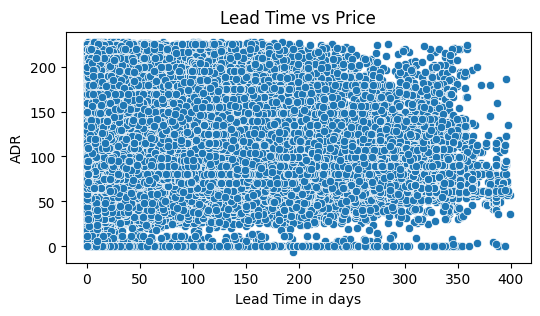

In [297]:
# Bivariate/Multivariate Analysis
# Lead Time vs ADR

plt.figure(figsize=(6,3))
sns.scatterplot(x=df_new[df_new['lead_time']<400]['lead_time'], y=df[df['lead_time']<400]['adr'])
plt.xlabel('Lead Time in days')
plt.ylabel('ADR')
plt.title('Lead Time vs Price')
plt.show()

In [303]:
df_new.select_dtypes(include=['int64', 'float64']).columns


Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [305]:
numeric_df = df_new[['is_canceled','lead_time','is_repeated_guest','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests']]
#Pearson Correlation
pearson_corr = numeric_df.corr(method='pearson')
#sepearman correlation
spearman_corr = numeric_df.corr(method='spearman')

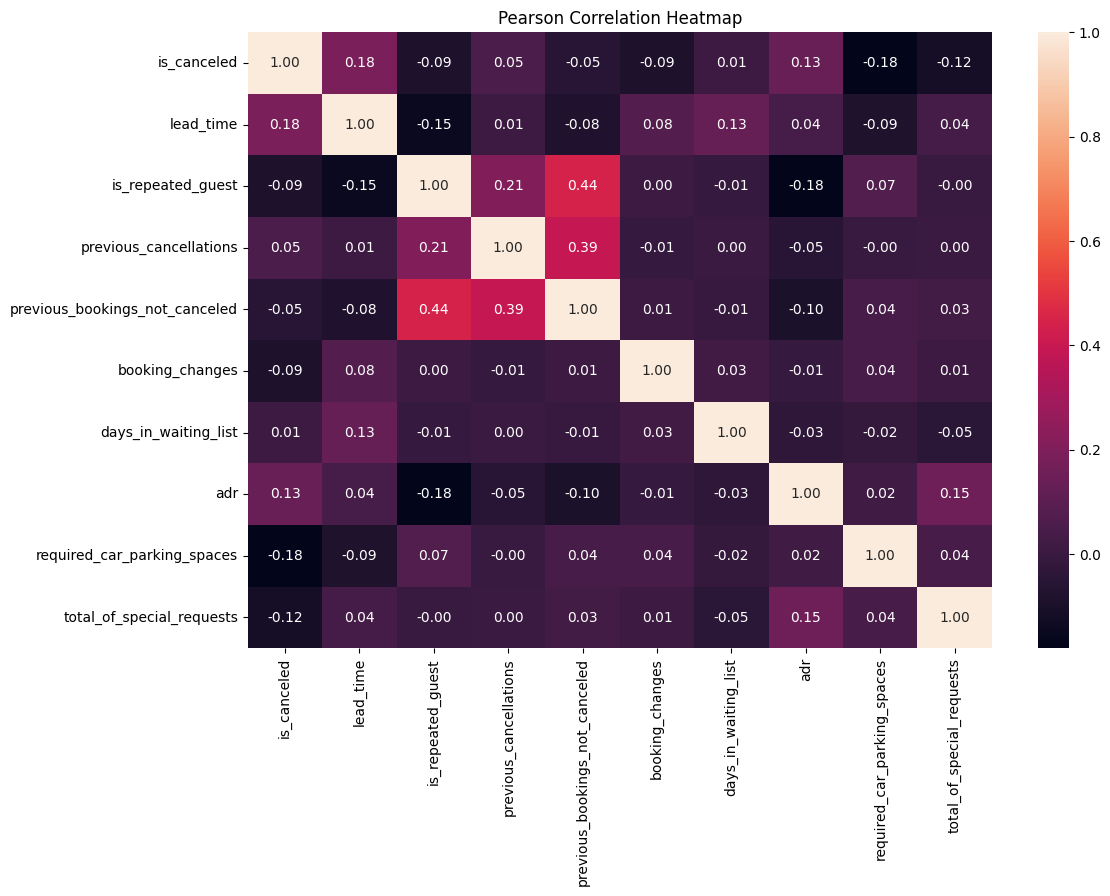

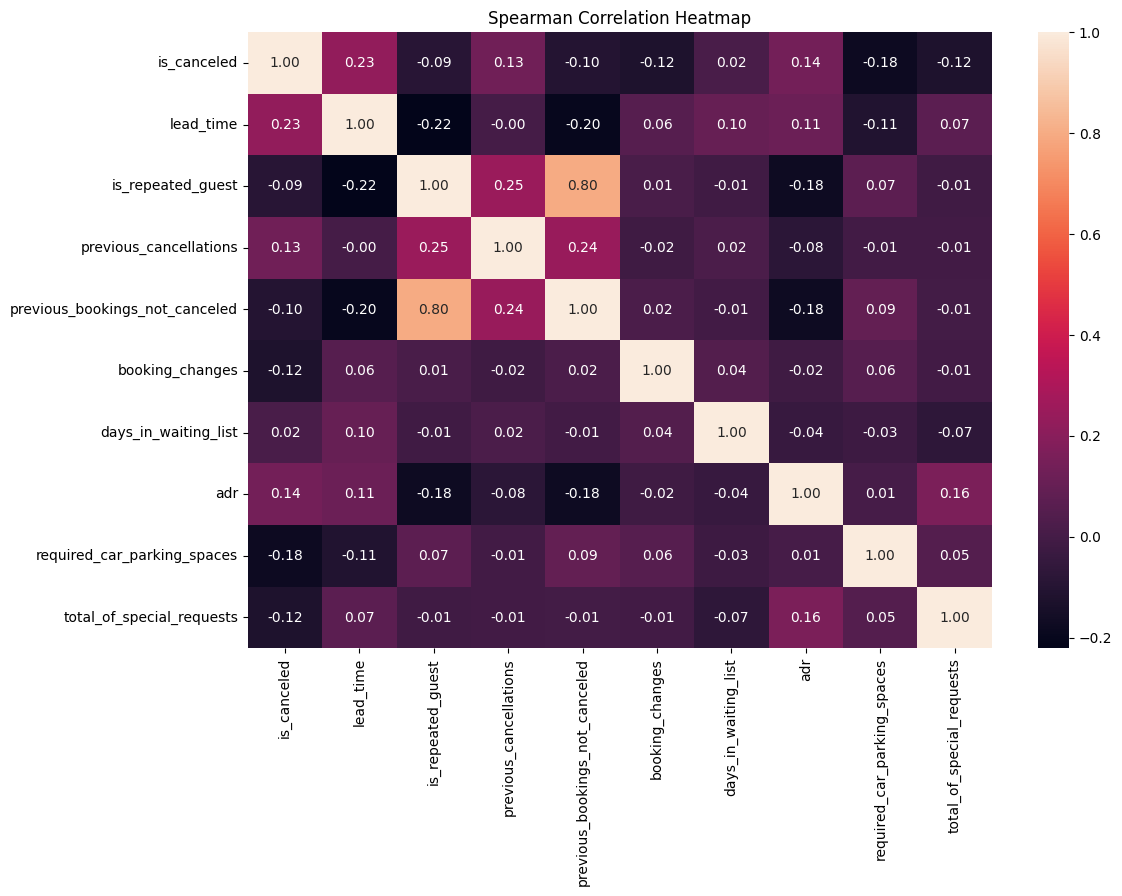

In [306]:
plt.figure(figsize=(12, 8))
sns.heatmap(pearson_corr, annot=True, fmt='.2f')
plt.title('Pearson Correlation Heatmap')
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(spearman_corr, annot=True, fmt='.2f')
plt.title('Spearman Correlation Heatmap')
plt.show()

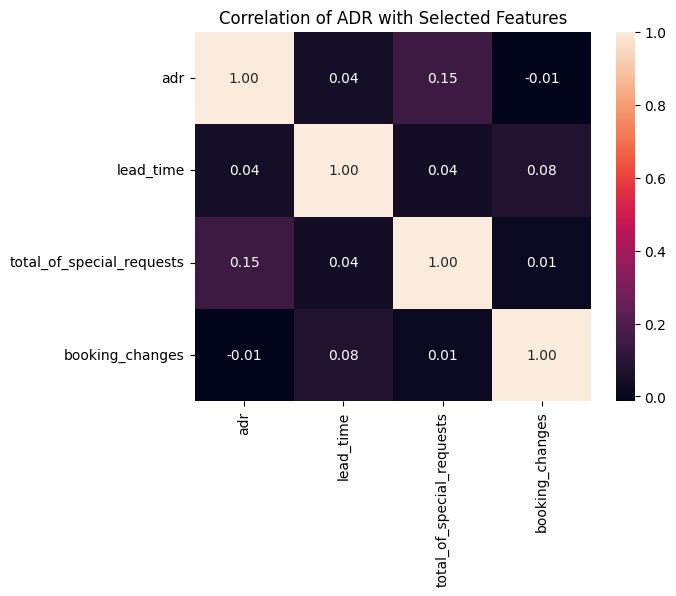

In [308]:
features = ['adr', 'lead_time', 'total_of_special_requests', 'booking_changes']
adr_corr = numeric_df[features].corr(method='pearson')
sns.heatmap(adr_corr, annot=True,  fmt='.2f')
plt.title('Correlation of ADR with Selected Features')
plt.show()

In [310]:
print("Correlation of ADR with lead_time:", adr_corr.loc['adr', 'lead_time'])
print("Correlation of ADR with special requests:", adr_corr.loc['adr', 'total_of_special_requests'])
print("Correlation of ADR with booking_changes:", adr_corr.loc['adr', 'booking_changes'])

Correlation of ADR with lead_time: 0.03988790032778095
Correlation of ADR with special requests: 0.1526552188026844
Correlation of ADR with booking_changes: -0.013510139794038076


In [312]:
from scipy.stats import ttest_ind

# Filter ADR values for each group
adr_online = df_new[df_new['distribution_channel'] == 'TA/TO']['adr']
adr_direct = df_new[df_new['distribution_channel'] == 'Direct']['adr']

# Perform t-test
t_stat, p_val = ttest_ind(adr_online, adr_direct, equal_var=False)

print("T-statistic:", t_stat)
print("P-value:", p_val)
if p_val < 0.05:
    print("Reject H0 → ADR differs between Online TA and Direct")
else:
    print("Fail to reject H0 → No significant difference in ADR")

T-statistic: 6.66395188274687
P-value: 2.7555283812576823e-11
Reject H0 → ADR differs between Online TA and Direct


In [357]:
from scipy.stats import mannwhitneyu

# Create binary feature for upgrade
df_new['room_upgraded'] = df_new['assigned_room_type'] != df_new['reserved_room_type']

# Separate lead times
lead_time_upgraded = df_new[df_new['room_upgraded']]['lead_time']
lead_time_not_upgraded = df_new[~df_new['room_upgraded']]['lead_time']

# Mann-Whitney U test
u_stat, p_val = mannwhitneyu(lead_time_upgraded, lead_time_not_upgraded, alternative='two-sided')

print("U-statistic:", u_stat)
print("P-value:", p_val)
if p_val < 0.05:
    print("Reject H0 → Lead time influences room upgrade")
else:
    print("Fail to reject H0 → Room upgrades are independent of lead time")

U-statistic: 353172823.5
P-value: 0.0
Reject H0 → Lead time influences room upgrade


<ipython-input-357-beb04a5668e7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['room_upgraded'] = df_new['assigned_room_type'] != df_new['reserved_room_type']


In [358]:
from scipy.stats import f_oneway

# Group by customer_type
grouped = [group['total_nights'] for name, group in df_new.groupby('customer_type')]

# Perform ANOVA
f_stat, p_val = f_oneway(*grouped)

print("F-statistic:", f_stat)
print("P-value:", p_val)
if p_val < 0.05:
    print("Reject H0 → Stay duration differs by customer type")
else:
    print("Fail to reject H0 → No significant difference in stay duration")

F-statistic: 886.5238561031284
P-value: 0.0
Reject H0 → Stay duration differs by customer type


<Axes: >

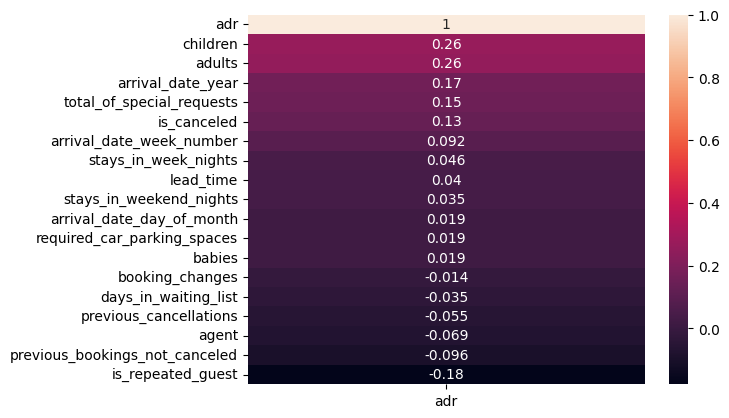

In [316]:
1.
corr_matrix = df_new.corr(numeric_only=True)
sns.heatmap(corr_matrix[['adr']].sort_values(by='adr', ascending=False), annot=True)

<Axes: xlabel='lead_time', ylabel='booking_changes'>

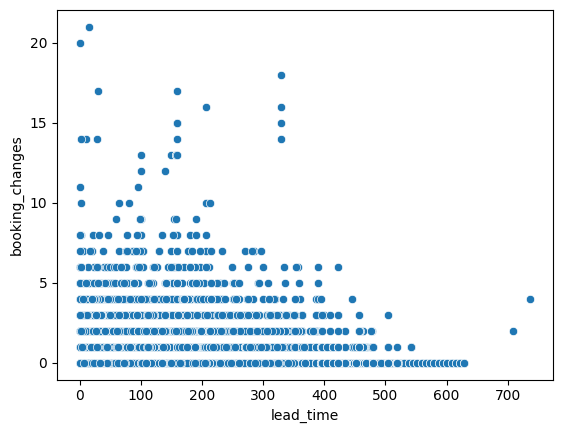

In [317]:
# 2.
sns.scatterplot( x='lead_time', y='booking_changes', data=df_new)

<Axes: xlabel='is_canceled', ylabel='lead_time'>

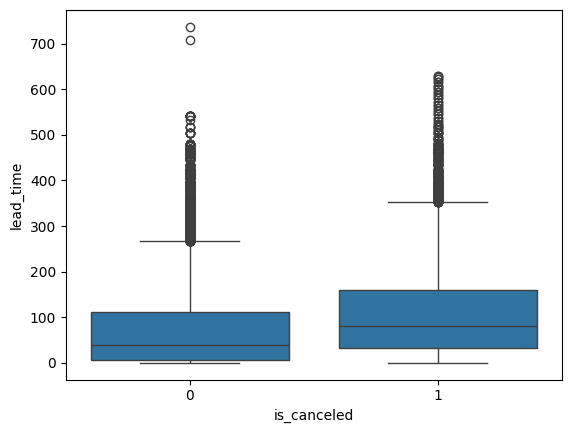

In [318]:
sns.boxplot(x='is_canceled', y='lead_time', data=df_new)

In [319]:
# 3.
df_new.groupby('country')['adr'].mean().sort_values(ascending=False).head(10)

,adr
country,
UMI,200.000000
LAO,181.665000
NCL,175.500000
FRO,165.666667
GIB,157.710769
SLV,148.850000
PHL,147.710312
BHR,145.330000
MMR,145.000000


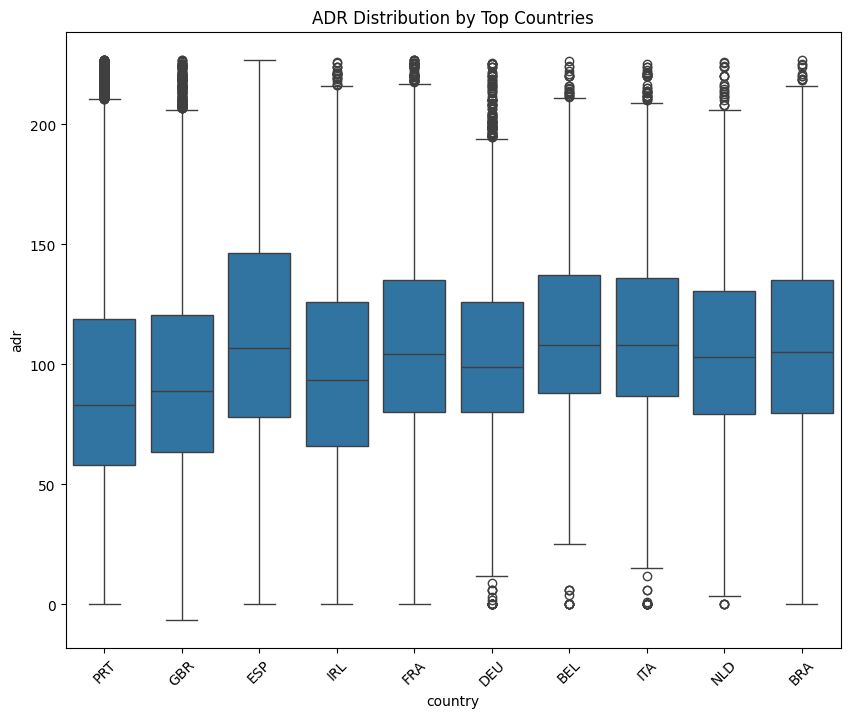

country
PRT    27012
GBR    10252
FRA     8642
ESP     6790
DEU     5334
ITA     2994
IRL     2981
BEL     2048
BRA     1956
NLD     1880
Name: count, dtype: int64


In [324]:
#3.1 ADR by country (top 10 countries by bookings)
plt.figure(figsize=(10,8))
top_countries = df_new['country'].value_counts().head(10).index
sns.boxplot(x='country', y='adr', data=df_new[df_new['country'].isin(top_countries)])
plt.title('ADR Distribution by Top Countries')
plt.xticks(rotation=45)
plt.show()

# Booking counts by country
print(df_new['country'].value_counts().head(10))

In [322]:
# 4.
df_new['is_upgraded'] = df_new['reserved_room_type'] != df_new['assigned_room_type']
df_new['is_upgraded'].head()

<ipython-input-322-9b116cbe6c92>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['is_upgraded'] = df_new['reserved_room_type'] != df_new['assigned_room_type']


,is_upgraded
0,False
1,False
2,True
3,False
4,False


<ipython-input-328-fdbf49f33e27>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['room_upgrade'] = df_new['assigned_room_type'] != df_new['reserved_room_type']


Upgrade or reassignment rate: 15.27%


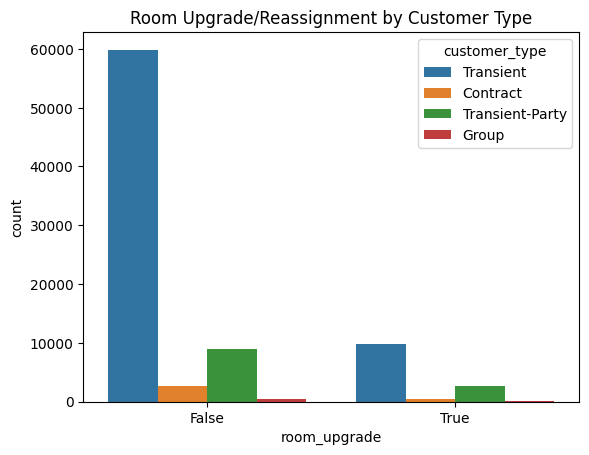

In [328]:
# Create a column if upgrade happened (assigned room better than reserved)
df_new['room_upgrade'] = df_new['assigned_room_type'] != df_new['reserved_room_type']

upgrade_rate = df_new['room_upgrade'].mean()
print(f'Upgrade or reassignment rate: {upgrade_rate:.2%}')

# Upgrade by customer type
sns.countplot(x='room_upgrade', hue='customer_type', data=df_new)
plt.title('Room Upgrade/Reassignment by Customer Type')
plt.show()


In [330]:
df_new['total_guests'] = df_new['adults'] + df_new['children'] + df_new['babies']

<ipython-input-330-b9b24ee5c2ad>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['total_guests'] = df_new['adults'] + df_new['children'] + df_new['babies']


In [332]:
# 5.
df_new['total_guests'].value_counts().head()

,count
total_guests,
2.0,56210
1.0,16001
3.0,9527
4.0,2889
0.0,166


In [334]:
match_rate = (df_new['reserved_room_type'] == df_new['assigned_room_type']).mean()
print(f'Reserved and assigned room : {match_rate:.2%}')

Reserved and assigned room : 84.73%


In [ ]:
df['group_size'] = df['adults'] + df['children'] + df['babies']

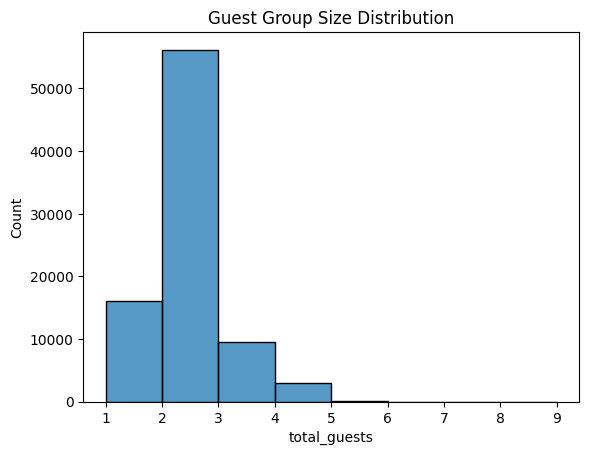

country
PRT    27012
GBR    10252
FRA     8642
ESP     6790
DEU     5334
ITA     2994
IRL     2981
BEL     2048
BRA     1956
NLD     1880
Name: count, dtype: int64


In [336]:
# Group size
sns.histplot(df_new['total_guests'], bins=range(1,10))
plt.title('Guest Group Size Distribution')
plt.show()

# Nationality top 10
print(df_new['country'].value_counts().head(10))


<Axes: xlabel='customer_type', ylabel='adr'>

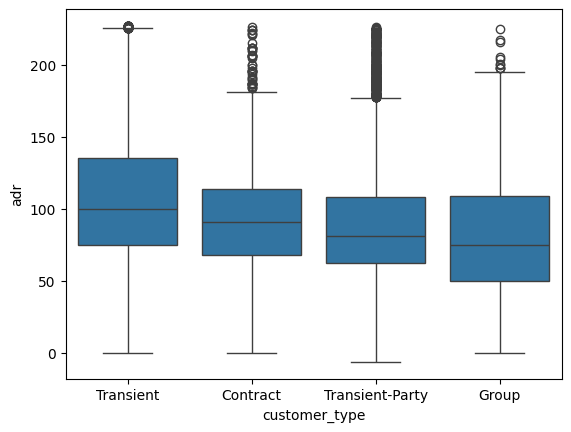

In [337]:
# 6.
sns.boxplot(x='customer_type', y='adr', data=df_new)

In [338]:
df_new['total_nights'] = df_new['stays_in_weekend_nights'] + df_new['stays_in_week_nights']

<ipython-input-338-aaa5c37277a2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['total_nights'] = df_new['stays_in_weekend_nights'] + df_new['stays_in_week_nights']


In [339]:

df_new['total_nights'].head()

,total_nights
0,0
1,0
2,1
3,1
4,2


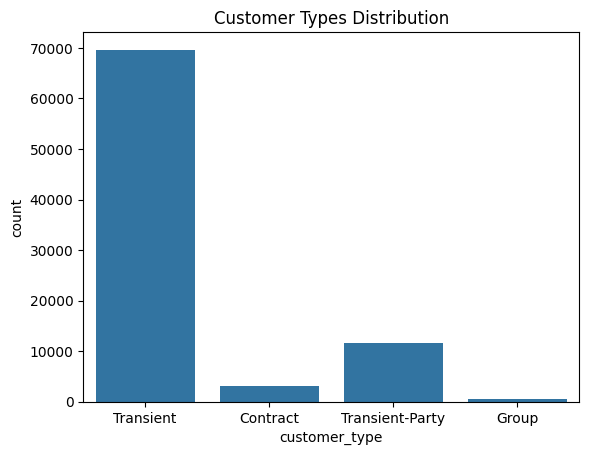

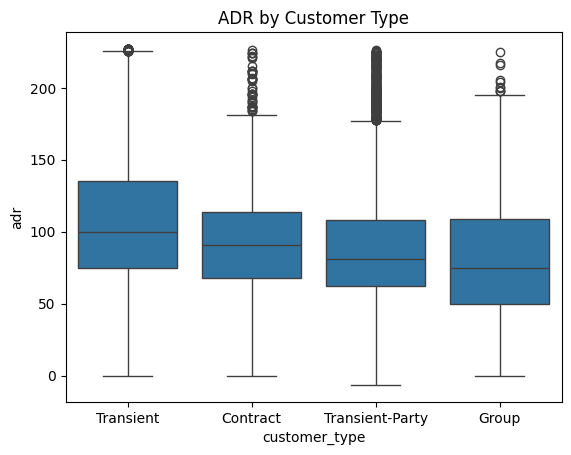

In [340]:
sns.countplot(x='customer_type', data=df_new)
plt.title('Customer Types Distribution')
plt.show()

# ADR by customer type
sns.boxplot(x='customer_type', y='adr', data=df_new)
plt.title('ADR by Customer Type')
plt.show()


In [345]:
df_new['country'].value_counts().head(5)

,count
country,
PRT,27012
GBR,10252
FRA,8642
ESP,6790
DEU,5334


In [344]:
top_countries = df_new['country'].value_counts().head(5).index.tolist()
top_countries

['PRT', 'GBR', 'FRA', 'ESP', 'DEU']

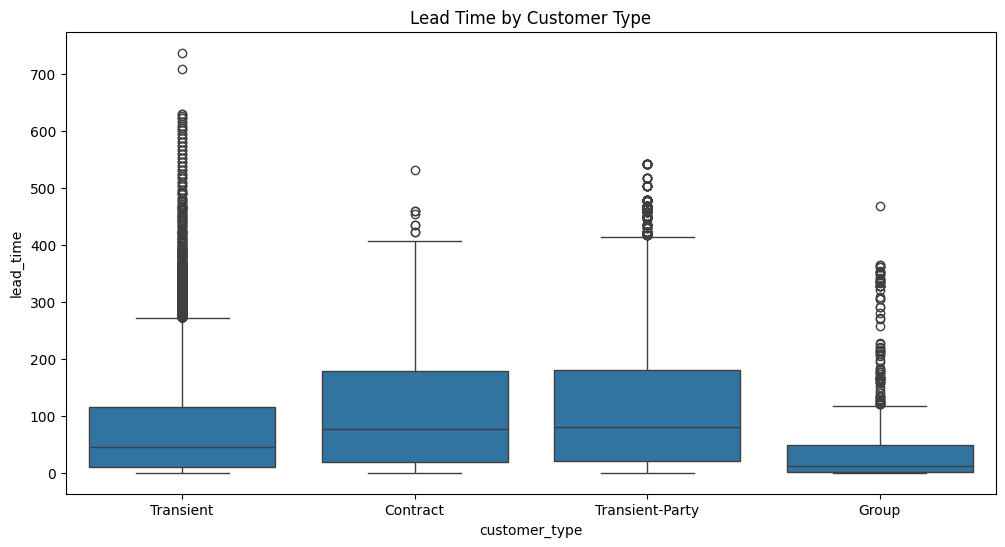

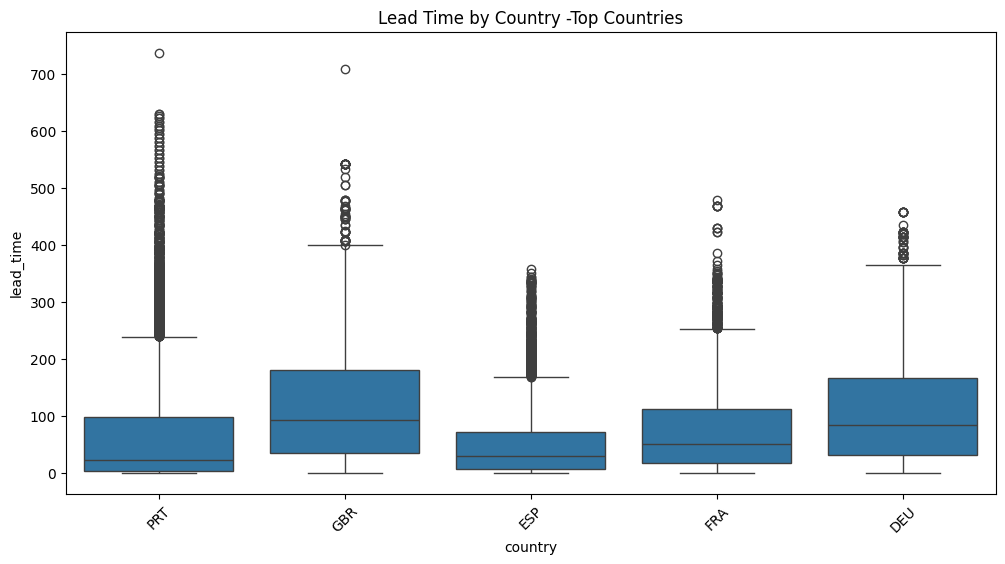

In [347]:
# 8.
plt.figure(figsize=(12,6))
sns.boxplot(x='customer_type', y='lead_time', data=df_new)
plt.title('Lead Time by Customer Type')
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(x='country', y='lead_time', data=df_new[df_new['country'].isin(top_countries)])
plt.title('Lead Time by Country -Top Countries')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# 9.
sns.scatterplot(x='lead_time', y='booking_changes', data=df_new)
plt.title('Lead Time vs Booking Changes')
plt.show()

sns.boxplot(x='is_canceled', y='lead_time', data=df_new)
plt.title('Lead Time by Cancellation Status')
plt.show()

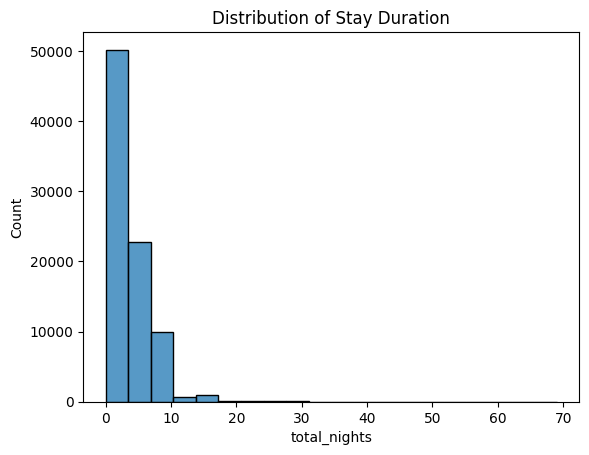

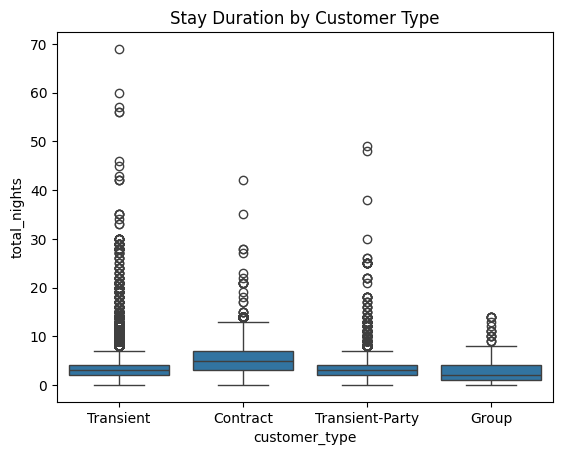

In [349]:
# 10.
sns.histplot(df_new['total_nights'], bins=20)
plt.title('Distribution of Stay Duration')
plt.show()

sns.boxplot(x='customer_type', y='total_nights', data=df_new)
plt.title('Stay Duration by Customer Type')
plt.show()

In [ ]:
# 11.
# same as question 4

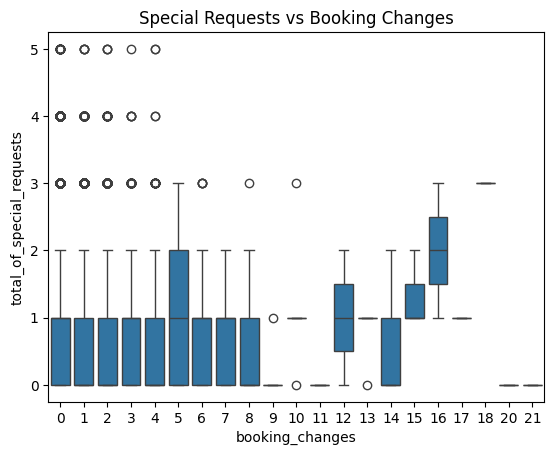

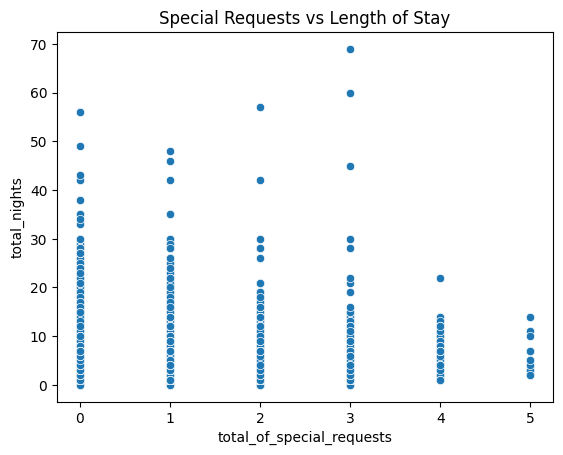

In [350]:
# 12.
sns.boxplot(x='booking_changes', y='total_of_special_requests', data=df_new)
plt.title('Special Requests vs Booking Changes')
plt.show()

sns.scatterplot(x='total_of_special_requests', y='total_nights', data=df_new)
plt.title('Special Requests vs Length of Stay')
plt.show()

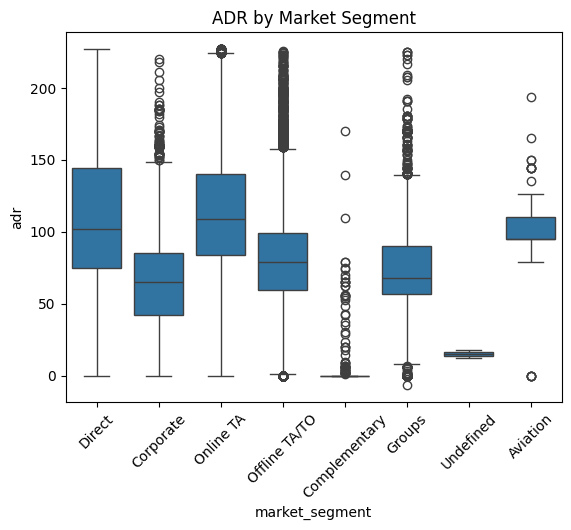

Cancellation Rate by Distribution Channel:
 distribution_channel
Corporate    0.127517
Direct       0.145393
GDS          0.198895
TA/TO        0.305821
Undefined    0.800000
Name: is_canceled, dtype: float64


In [351]:
# 13.
sns.boxplot(x='market_segment', y='adr', data=df_new)
plt.title('ADR by Market Segment')
plt.xticks(rotation=45)
plt.show()

booking_consistency = df_new.groupby('distribution_channel')['is_canceled'].mean()
print("Cancellation Rate by Distribution Channel:\n", booking_consistency)

In [ ]:
# 14.
# same as question 1

<ipython-input-354-fbf13106e518>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['revenue'] = df_new['adr'] * df_new['total_nights']
<ipython-input-354-fbf13106e518>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='customer_type', y='revenue', data=df_new, ci=None)


customer_type
Contract           522.789949
Group              245.607228
Transient          382.979672
Transient-Party    284.643153
Name: revenue, dtype: float64


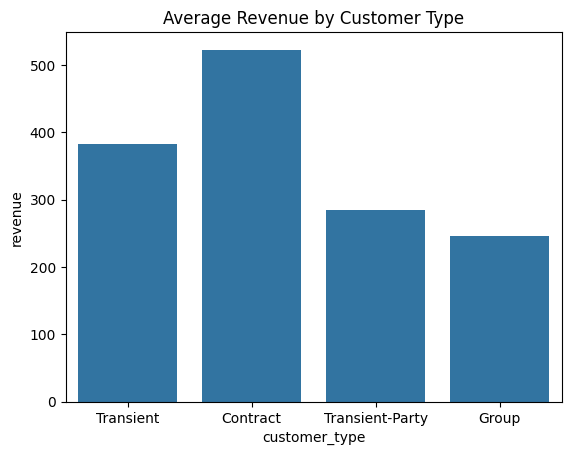

In [354]:
# 15.
df_new['revenue'] = df_new['adr'] * df_new['total_nights']
revenue_by_customer_type = df_new.groupby('customer_type')['revenue'].mean()
print(revenue_by_customer_type)

sns.barplot(x='customer_type', y='revenue', data=df_new, ci=None)
plt.title('Average Revenue by Customer Type')
plt.show()

In [ ]:
# 16.
# same as question 1 and 3

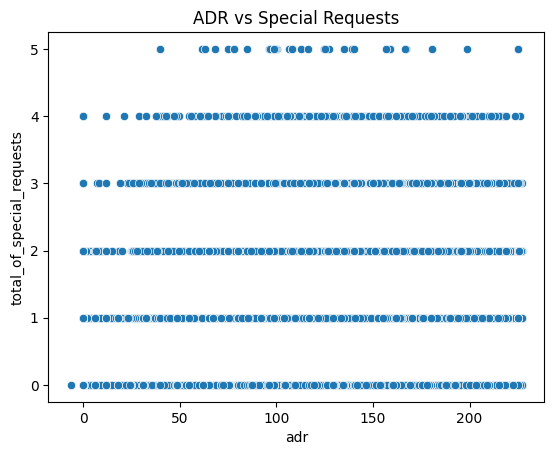

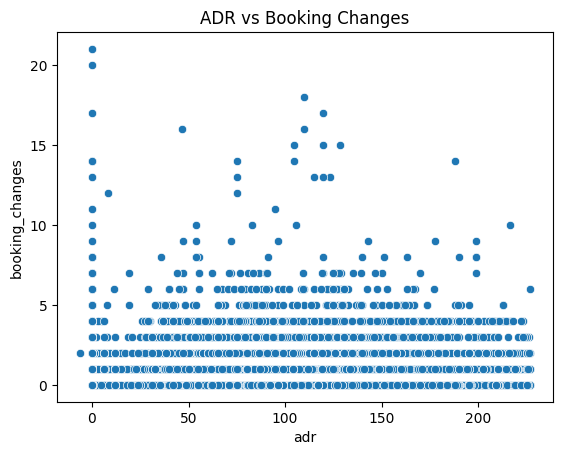

In [355]:
# 17.
sns.scatterplot(x='adr', y='total_of_special_requests', data=df_new)
plt.title('ADR vs Special Requests')
plt.show()

sns.scatterplot(x='adr', y='booking_changes', data=df_new)
plt.title('ADR vs Booking Changes')
plt.show()

In [ ]:
# 18.
# same as question 3 and 7

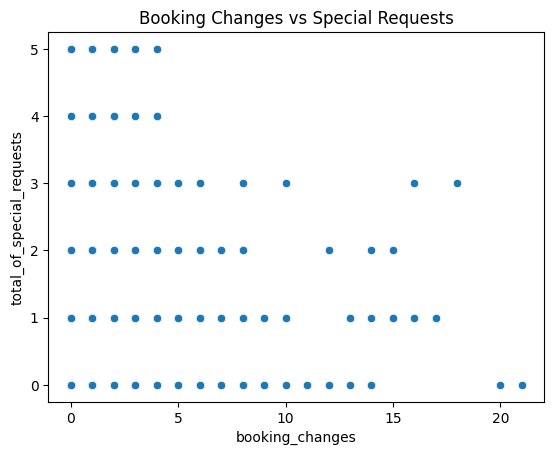

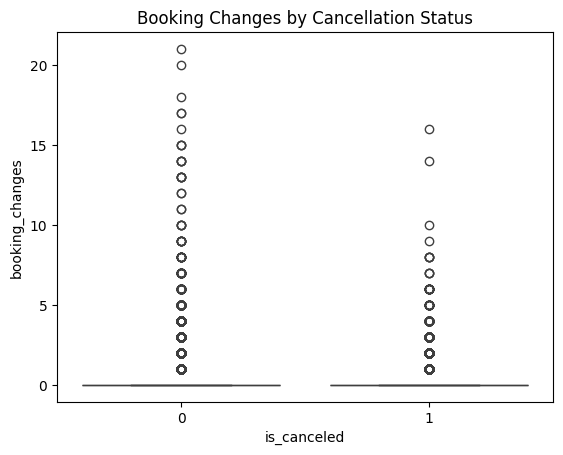

In [356]:
# 19.
sns.scatterplot(x='booking_changes', y='total_of_special_requests', data=df_new)
plt.title('Booking Changes vs Special Requests')
plt.show()

sns.boxplot(x='is_canceled', y='booking_changes', data=df_new)
plt.title('Booking Changes by Cancellation Status')
plt.show()